In [1]:
#pip install numpy pandas seaborn matplotlib ipython scipy statsmodels scikit-learn yellowbrick

import pandas as pd

sat_df = pd.read_csv('http://bit.ly/PMR-ch2')
sat_df.Segment = sat_df.Segment.astype(pd.api.types.CategoricalDtype())
sat_df.head()

,iProdSAT,iSalesSAT,Segment,iProdREC,iSalesREC
0,6,2,1,4,3
1,4,5,3,4,4
2,5,3,4,5,4
3,3,3,2,4,4
4,3,3,3,2,2


In [2]:
sat_df.describe()

,iProdSAT,iSalesSAT,iProdREC,iSalesREC
count,500.000000,500.000000,500.000000,500.000000
mean,4.130000,3.802000,4.044000,3.444000
std,1.091551,1.159951,1.299786,1.205724
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000


<Axes: >

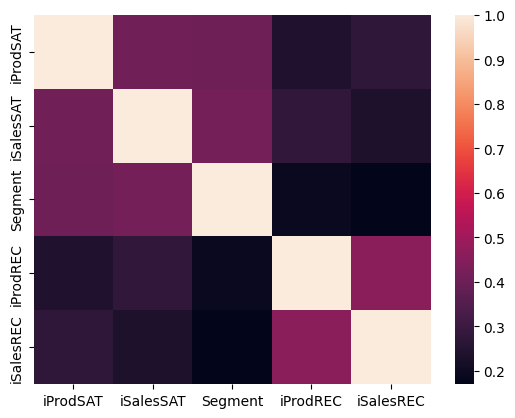

In [3]:
import seaborn as sns
sns.heatmap(sat_df.corr())

In [4]:
#Does product Satisfaction differ by segment
sat_df.groupby('Segment').iProdSAT.mean()

C:\Users\Kyle\AppData\Local\Temp\ipykernel_29496\3643269119.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sat_df.groupby('Segment').iProdSAT.mean()


Segment
1    3.462963
2    3.725191
3    4.103896
4    4.708075
Name: iProdSAT, dtype: float64

In [5]:
import statsmodels.formula.api as smf
from statsmodels.stats import anova as sms_anova

segment_psat_lm = smf.ols('iProdSAT ~ -1 + Segment',
                          data = sat_df).fit()

sms_anova.anova_lm(segment_psat_lm)

,df,sum_sq,mean_sq,F,PR(>F)
Segment,4.0,8627.850038,2156.962510,2160.66543,3.569726e-312
Residual,496.0,495.149962,0.998286,NaN,NaN


<ErrorbarContainer object of 3 artists>

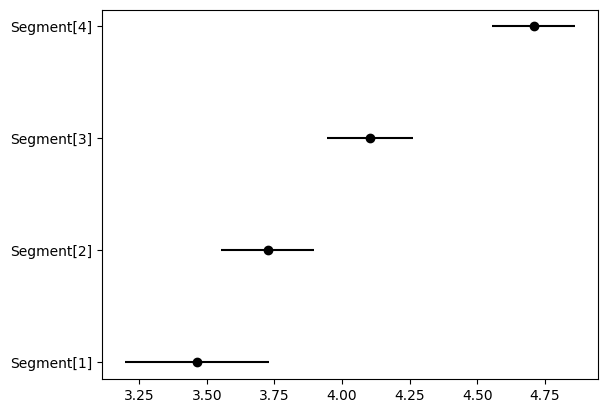

In [6]:
#Visualize confidence interval for mean product satisfaction by segment
import matplotlib.pyplot as plt
plt.errorbar(y = segment_psat_lm.params.index,
             x = segment_psat_lm.params.values,
             xerr = segment_psat_lm.conf_int()[1].T
                - segment_psat_lm.params,
                fmt = 'ko')

In [7]:
# 2.2 Basics of Working With Python Commands
# Initialize a list
x = [1,23,6] 
print(x)

[1, 23, 6]


In [8]:
#2.4.2 Booleans
print(1 == 1)
print(1 < 2)
print(1 == 2)

x = True
y = False
print(x or y)
print(x and y)
print(x and not y)

True
True
False
True
False
True


In [9]:
#2.4.3 Numeric Types
x = 2
y = 4
print(x + y)

w = x/y
print(w)

print(x ** y) #exponent

z = 3.2
type(x * z)


6
0.5
16


float

In [10]:
# 2.4.4 Sequence Types
# Lists - ordered, mutable sequences of objects.
x = [0,1,2,3,4,5]
y = ['a','b','c']
print(x + y)

x.append('r')
print(x)

print(len(x))




[0, 1, 2, 3, 4, 5, 'a', 'b', 'c']
[0, 1, 2, 3, 4, 5, 'r']
7


In [11]:
#Indexing
print(x[1]) # returns the second value
print(x[2:4]) # returns a range
print(x[:2]) # returns the start of index to number 2
print(x[1:]) # returns from the second value to end of list
print(x[-2:]) # returns the last two realtive to the end of the list
x[2] = 'freeze' #changing the value of 2 to freeze in the list

1
[2, 3]
[0, 1]
[1, 2, 3, 4, 5, 'r']
[5, 'r']


In [12]:
# Tuples - similar to list BUT immutable
z = (7,8,9)
print(z[1])
# z[1] = 'boil' # returns an error - tuple doesn't support item assignment

8


In [13]:
# Ranges - Immutable sequences of numbers mostly used for loops

print(range(10))
print(list(range(10))) # returns a list of the range to view content
print(list(range(2,12))) # start and stop specified

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [14]:
# Text Type: string
x = 'Hello'
y = 'World'
print(x + y)
print(x[3:])
print(x.upper())
print(x.replace('lo','p'))
print(', '.join([x,y,'what a day!']))
print('Hello, World, what a day!'.split(','))

#Format
temperature = 21.34
print('The temperature today is {} degrees'.format(temperature))
x = 18.93
y = 345.234
print('{} divided by {} equals {}'.format(x,y,x/y))
print('{x} plus {x} plus {y} equals {r}'.format(x=x,y=y,r=x + x + y))


HelloWorld
lo
HELLO
Help
Hello, World, what a day!
['Hello', ' World', ' what a day!']
The temperature today is 21.34 degrees
18.93 divided by 345.234 equals 0.05483237456333965
18.93 plus 18.93 plus 345.234 equals 383.094


In [15]:
#Sets - Can be used to grab all unique values from a collection of objects such as a list
x = [1,1,3,8,12,12]
print(set(x))
print(3 in x)
print(5 in x)
x = set([1,1,3,8,12,12])
y = set([2,2,8,9])
print(x.intersection(y))
print(y.difference(x))
print(x.union(y))

{8, 1, 3, 12}
True
False
{8}
{9, 2}
{1, 2, 3, 8, 9, 12}


In [16]:
# Mapping Type
x = dict(a=1,b=2,c=3) # creates a dictionary with dict function
print(x)
x = {'a':1,'b':2,'c':3} #creates a dictionary with curly brackets
print(x)
y = {1:'a',2:'b',3:'c'}
print(y)
print(x['a']) # pulls the return value of a
print(y.items()) # key values pulled 
print(y.keys()) # prints the keys
print(y.values()) #prints the values


{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}
{1: 'a', 2: 'b', 3: 'c'}
1
dict_items([(1, 'a'), (2, 'b'), (3, 'c')])
dict_keys([1, 2, 3])
dict_values(['a', 'b', 'c'])


In [17]:
# Fuctions, Classes, and Methods
# functions
def add(a,b):
    return a + b
print(add(3,4)) #positionally assign
print(add(a=3,b=4)) # passed keyword

def add(a, b=0):  # allows B to be optional by setting a value.
    return a + b
print(add(3))
print(add(3,4)) # can overwrite the value assigned if a value is given. 

# Classes & Methods
class Adder:
    '''A class that adds its parameters'''
    def __init__(self, a, b):
        self.x = a
        self.y = b

    def add(self):
        return self.x + self.y


adder = Adder(3, 4)
print(adder.add())
print(adder.x)
print(adder.y)

adder2 = Adder('frog', 'coyote')
print(adder2.add())

7
7
3
7
7
3
4
frogcoyote


In [18]:
#Modules & Packages
import sys
sys.path.append('/absolute/path/to/module.py')
# !pip install python_marketing_research
from python_marketing_research_functions import chapter2
print(chapter2.add(3,4))
adder = chapter2.Adder(3,4)
print(adder.add())

7
7


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#Control Flow Statements
# if statements

x = 5
if x > 2:
    print('x = {}, which is greater than 2'.format(x))
print('Done!')

x = 0
if x > 2:
    print('x = {}, which is greater than 2'.format(x))
print('Done!')

x = 0
if x > 2:
    print('x = {}, which is greater than 2'.format(x))
else:
    print('x = {}, which is less than or equal to 2'.format(x))


x = 0
if x > 2:
    print('x = {}, which is greater than 2'.format(x))
elif x == 2:
    print('x = {}, which equals 2!'.format(x))
else:
    print('x = {}, which is less than 2'.format(x))

def check_present(value,values):
    if value in values:
        print('{} was found in the values'.format(value))
    else:
        print('{} was NOT found in the values'.format(value))
a = set([4,2,5,1,12,33])
print(check_present(38,a))
print(check_present(12,a))

x = 5, which is greater than 2
Done!
Done!
x = 0, which is less than or equal to 2
x = 0, which is less than 2
38 was NOT foundin the values
None
12 was found in the values
None


In [6]:
# While Loops 
x = 0
while x < 5:
    print(x)
    x += 1 # iterates through until evaluated false

a = [4,2,5,1,12,33]
a_squared = []
i = 0

while i < len(a):
    a_squared.append(a[i]**2)
    i += 1
print('a_squared generated: {}'.format(a_squared))

0
1
2
3
4
a_squared generated: [16, 4, 25, 1, 144, 1089]


In [19]:
#For Loop
a = [4,2,5,1,12,33]
a_squared = []

for x in a:
    a_squared.append(x**2)
print('a_squared generated: {}'.format(a_squared))

for i in range(5):
    print(i)

a_squared = []
for i in range(len(a)):
    a_squared.append(a[i]**2)
print('a_squared generated: {}'.format(a_squared))

for i in range (21,100,12): # start at 21, go to 100, and count by 12
    print(i)

for x, y in zip(range(6),range(6,18,2)): # zips together two collection and iterates through a pair of ranges
    print(x,y)

for j, k in zip(range(6), range(6,12,2)):
    print(j,k)

for i, x in enumerate(a):
    print(i,x)

# While statement example
x = 34
y = x - 1
while True:
    if x % y == 0:
        break
    y -= 1
print('{y} is the largest factor of {x}, \n{f2} times {y} equals {x}'.format(y = y, x = x, f2 = x / y))

a_squared generated: [16, 4, 25, 1, 144, 1089]
0
1
2
3
4
a_squared generated: [16, 4, 25, 1, 144, 1089]
21
33
45
57
69
81
93
0 6
1 8
2 10
3 12
4 14
5 16
0 6
1 8
2 10
0 4
1 2
2 5
3 1
4 12
5 33
17 is the largest factor of 34, 
2.0 times 17 equals 34


In [29]:
#List comprehension
a = [4,2,5,1,12,33]
a_plus_one = [x + 1 for x in a]
print(a_plus_one)


a_plus_on_filtered = [ x + 1 for x in a if x < 12] # if statement is acting as a filter
print(a_plus_on_filtered)

a_modified = [x + 1 if x < 12 else x * 100 for x in a] # if statement before the for requires an else
print(a_modified)

a_square_tuples = [(v, v ** 2) for v in a] # used to generate a list of tuples
print(a_square_tuples)

a_reconstructed = [w/v for v,w in a_square_tuples] # iterate through list of tuples
print(a_reconstructed)

a_square_dict = {v: v**2 for v in a}
print(a_square_dict)



[5, 3, 6, 2, 13, 34]
[5, 3, 6, 2]
[5, 3, 6, 2, 1200, 3300]
[(4, 16), (2, 4), (5, 25), (1, 1), (12, 144), (33, 1089)]
[4.0, 2.0, 5.0, 1.0, 12.0, 33.0]
{4: 16, 2: 4, 5: 25, 1: 1, 12: 144, 33: 1089}


In [20]:
# Help! Detour
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |
 |  Methods defined here:
 |
 |  __bool__(self, /)
 |      True if self else False
 |
 |  __contains__(self, key, /)
 |      Return bool(key in self).
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |
 |  __getitem__(self, key, /)
 |      Return self[key].
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __hash__(self, /)
 |

In [32]:
#numpy arrays
import numpy as np
x = np.array([1,3,4,'a','b'])
print(x)
print(x.dtype)

['1' '3' '4' 'a' 'b']
<U21


In [43]:
#vectorized Operations

a = [7,4,2,22,-12]
a_squared = []

for v in a:
    a_squared.append(v ** 2)
print(a_squared) 

print([v ** 2 for v in a]) # does the samething as a loop statement

x = np.array(a)
print(x**2) # even more efficient

print(x>5) # Boolean return if the value is greater than 5

print((x > 5).sum()) # any value greater than 5 

print((x > 5).sum()/len(x)) # proportion of values in x that are greater than 5

print(x[x > 5]) # shows the values that are greater than 5

y = np.array([34,2,9,-5,-18])
print(x / y)

[49, 16, 4, 484, 144]
[49, 16, 4, 484, 144]
[ 49  16   4 484 144]
[ True False False  True False]
2
0.4
[ 7 22]
[ 0.20588235  2.          0.22222222 -4.4         0.66666667]


In [ ]:
# Series

array([ 49,  16,   4, 484, 144])